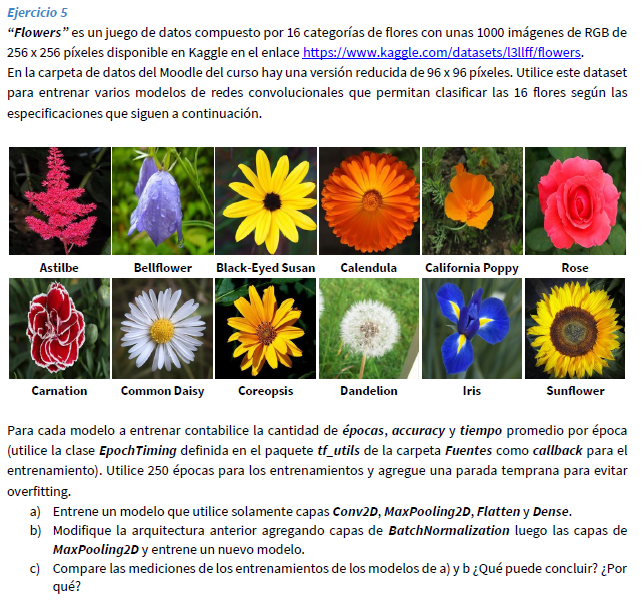

In [5]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

## Importo librerias

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from ClassEpochTiming import EpochTiming

## Preparo datos

In [7]:
# constantes para arquitectura, generación datos y entrenamiento/validacion
IMG_SIZE = (96, 96, 3)  # tamaño de la imagen de entrada
N_CLASSES = 16          # cantidad de clases a identificar
LOTES = 128             # tamaño de lotes para entrenamiento y testeo 
ALFA = 0.01             # tasa de entrenamiento
EPOCAS = 1000           # cantidad de epocas a entrenar como máximo
PACIENCIA = 10          # parámetro para parada temprana
SEP_TRAIN_TEST = 0.2    # división en entrenamiento y validación 


IMAGES_DIR = DATOS_DIR + 'FlowersX16'

# construye un generador de imagenes para dividir en entrenamiento y validación
data_generator = ImageDataGenerator(
    validation_split=SEP_TRAIN_TEST,
    rescale= 1.0/255,
    zoom_range=0.15,  # (0.8,1.0),         # zoom
    width_shift_range=0.2,   # desplazamiento horizontal
    height_shift_range=0.2,  # desplazamiento vertical
    horizontal_flip=True,   # espejo horizontal
    brightness_range=(0.8, 1.2) # brillo
)

# generador para entrenamiento a partir de la carpeta indicada en IMAGES_DIR
train_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR, 
            class_mode='categorical',
            batch_size=LOTES,
            subset='training'   # asigna subconjunto segun validation_split del ImageDataGenerator
            )

valid_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR, 
            class_mode='categorical',
            batch_size=LOTES,
            subset='validation' # asigna subconjunto segun validation_split del ImageDataGenerator
            )

Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.


## Construyo modelo

In [21]:
ACTIVATION = LeakyReLU()

# %% construye le modelo
def build_model(img_size, classes):

    model = Sequential()

    model.add(Conv2D(8, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION, input_shape=img_size)) 
    model.add(MaxPooling2D(pool_size=(2,2)))  
    model.add(BatchNormalization())
    model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION)) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION)) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION)) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION)) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(100, activation = LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(100, activation = LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(classes, activation = 'softmax'))

    model.summary()
    return model


# %% construye le modelo
# obtiene la arquitectura para el modelo y lo compila
model = build_model(IMG_SIZE, N_CLASSES)
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# model.compile('RMSProp', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 94, 94, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 47, 47, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 47, 47, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 45, 45, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 22, 22, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 22, 22, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 20, 20, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         1,616 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,408 (485.97 KB)

 Trainable params: 123,704 (483.22 KB)

 Non-trainable params: 704 (2.75 KB)

## Entreno modelo

In [22]:
# Callback para parada temprana
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=PACIENCIA,  
                           restore_best_weights=True)

epoch_timing = EpochTiming()

H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps= 8,
    epochs=EPOCAS,
    callbacks=[early_stop, epoch_timing])

Epoch 1/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 29s 266ms/step - accuracy: 0.3048 - loss: 2.1884 - val_accuracy: 0.1074 - val_loss: 2.8121
Epoch 2/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.4803 - loss: 1.5326 - val_accuracy: 0.1543 - val_loss: 2.8681
Epoch 3/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.5359 - loss: 1.3787 - val_accuracy: 0.2295 - val_loss: 2.5209
Epoch 4/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - accuracy: 0.5767 - loss: 1.2571 - val_accuracy: 0.4058 - val_loss: 1.7573
Epoch 5/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - accuracy: 0.6019 - loss: 1.1905 - val_accuracy: 0.4805 - val_loss: 1.5430
Epoch 6/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - accuracy: 0.6213 - loss: 1.1212 - val_accuracy: 0.5566 - val_loss: 1.2956
Epoch 7/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.6559 - loss: 1.0301 - val_accuracy: 0.5986 - val_loss: 1.2506
Epoch 8/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.6592 - loss: 1

## Visualizo rendimiento

Tiempo promedio por época 24.97 segundos
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.6335 - loss: 1.0955
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.6318 - loss: 1.1595


[1.1717216968536377, 0.6259152889251709]

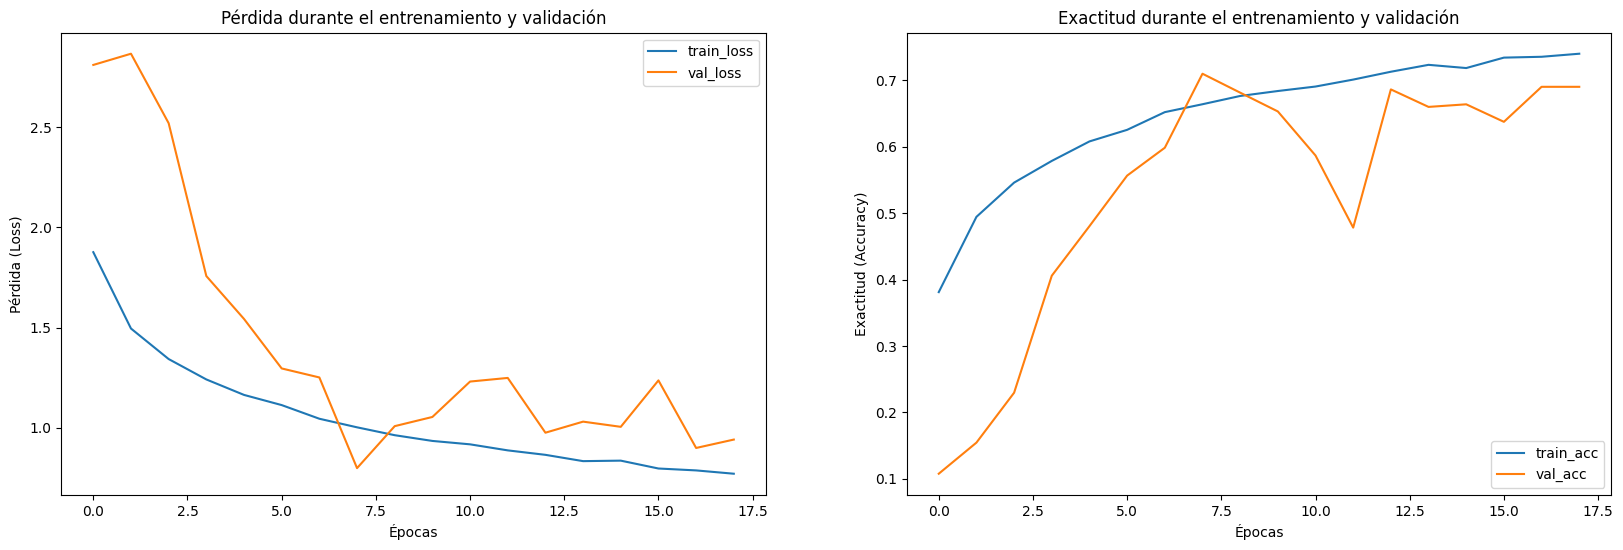

<Figure size 640x480 with 0 Axes>

In [23]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")
axs[0].set_title("Pérdida durante el entrenamiento y validación")  # Título del gráfico
axs[0].set_xlabel("Épocas")  # Etiqueta del eje X
axs[0].set_ylabel("Pérdida (Loss)")  # Etiqueta del eje Y
axs[0].legend(loc="upper right")  # Muestra la leyenda en la esquina superior derecha

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")
axs[1].set_title("Exactitud durante el entrenamiento y validación")  # Título del gráfico
axs[1].set_xlabel("Épocas")  # Etiqueta del eje X
axs[1].set_ylabel("Exactitud (Accuracy)")  # Etiqueta del eje Y
axs[1].legend(loc="lower right")  # Muestra la leyenda en la esquina inferior derecha


print('Tiempo promedio por época %.2f segundos' % epoch_timing.avg_epoch_time)
model.evaluate(train_iter)
model.evaluate(valid_iter)

----------
## **Modelo 1 (adam):**
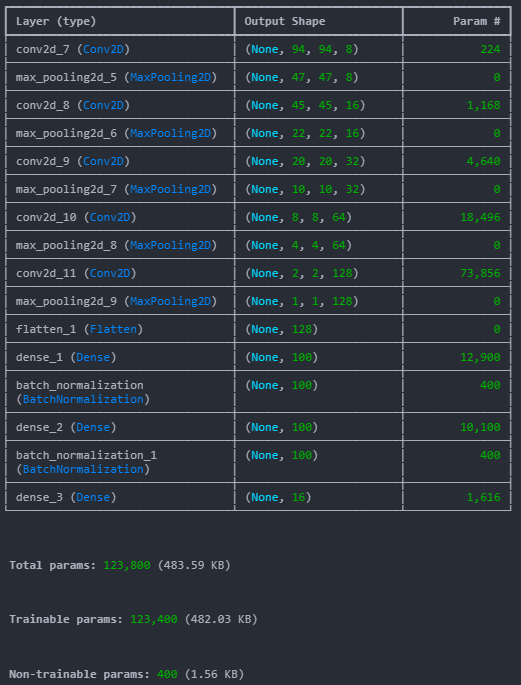
## Resultados:
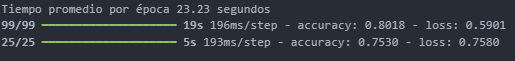
## Metricas:
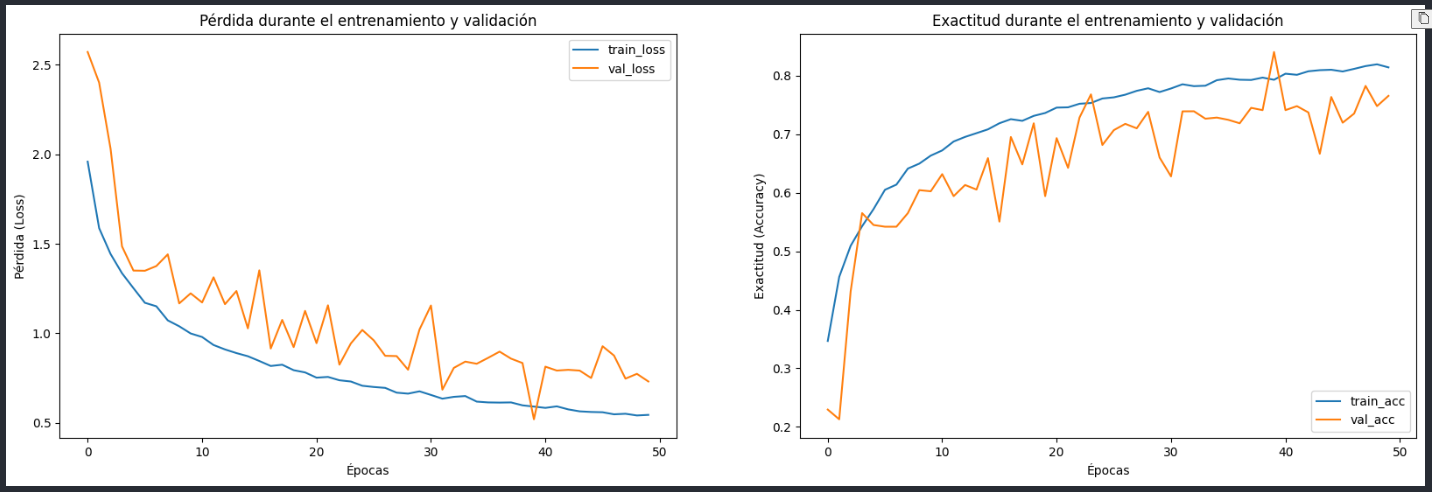

---------
## **Modelo 2 (adam):**
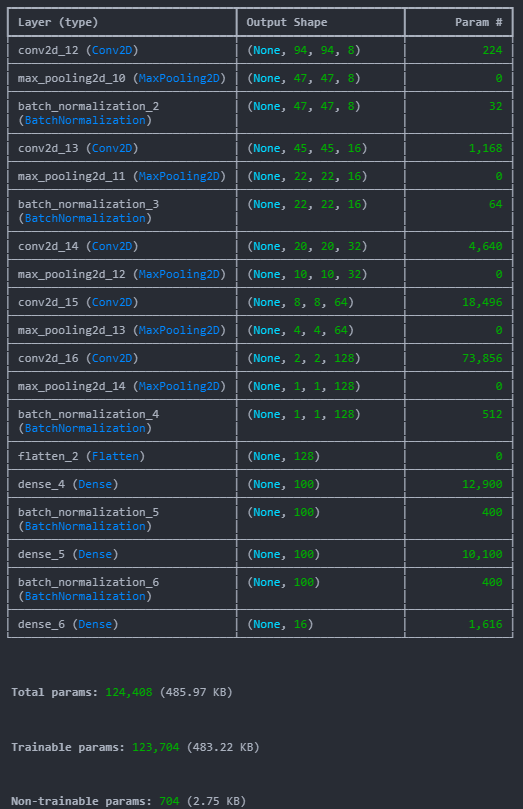
## Resultados:
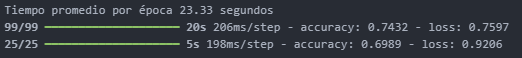
## Metricas:
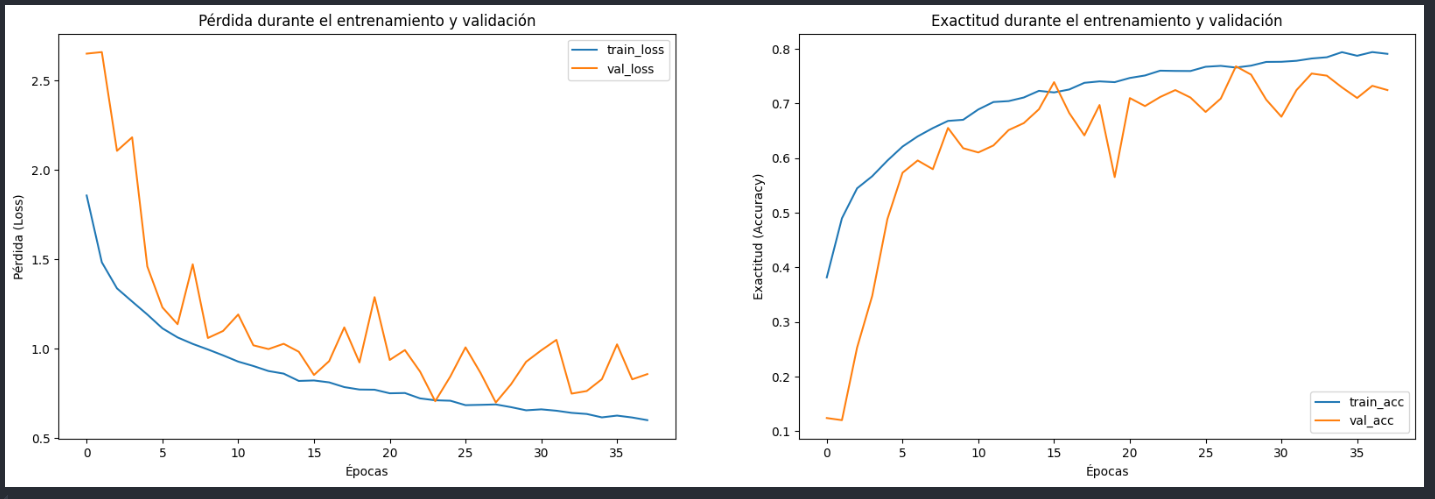

---------
## **Modelo 3 (RMSProp):**
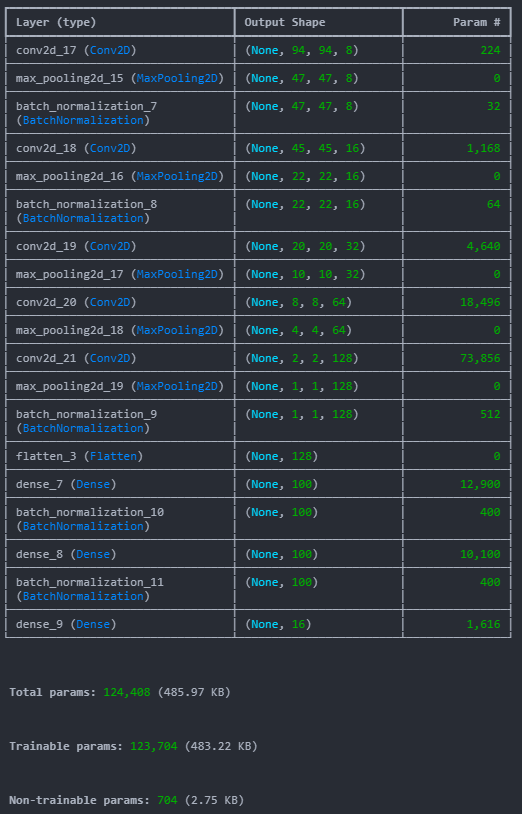
## Resultados:
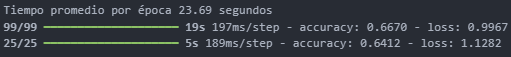
## Metricas:
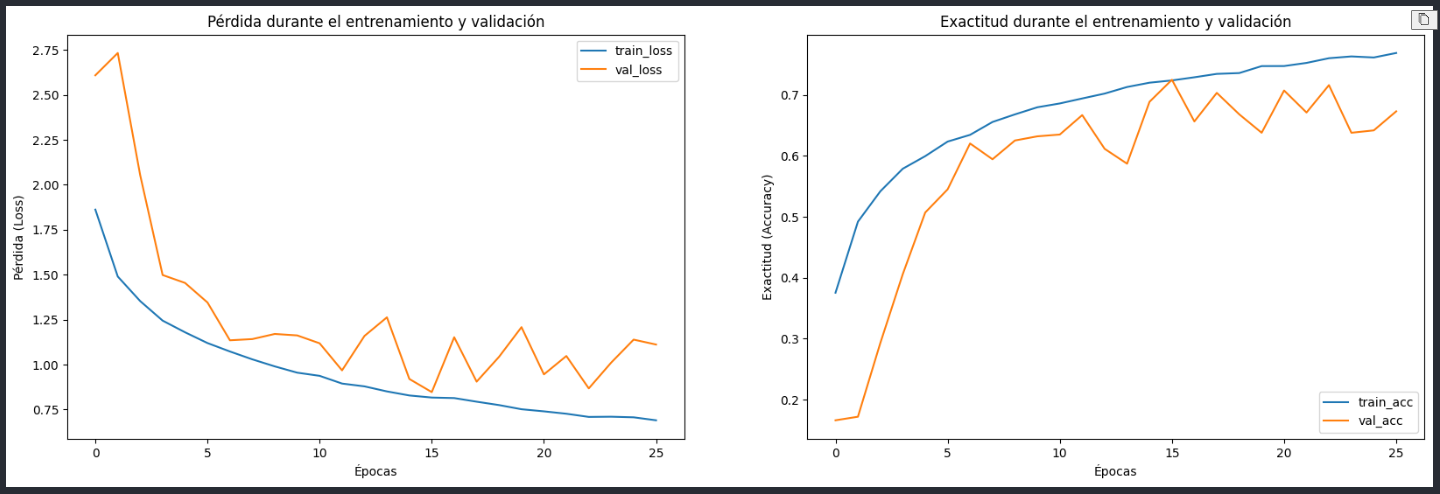


## Conclusion, batch normalization usa menos epocas pero menos efectivo (se supone que tambien es mas efectivo, pero lo corri dos veces y ninguna tuvo mayor accuracy que sin el)
### Lo ejecute una vez mas y dio esto (con batch):
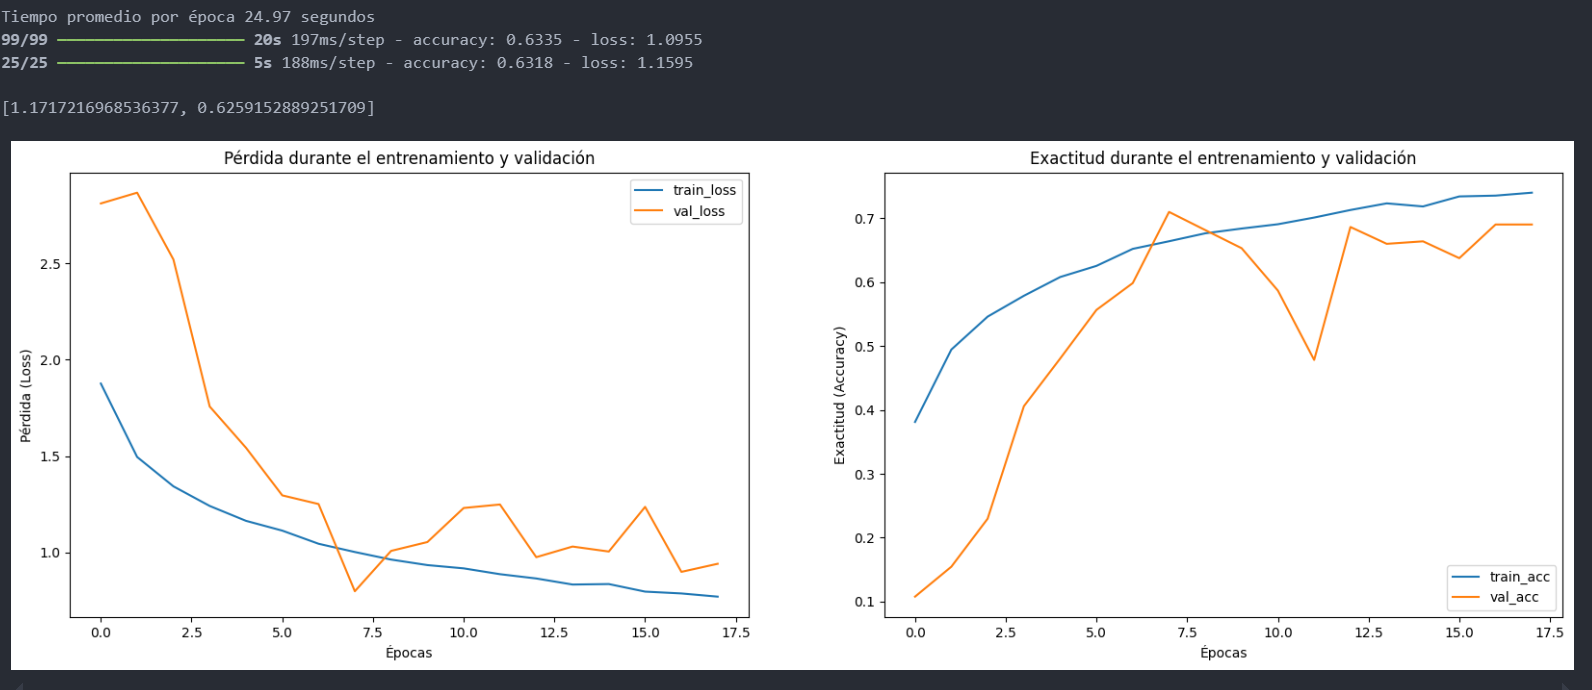